![](logo1.jpg)

# **shAI Training 2023 | Level 1**

## Task #8 (End-to-End ML Project {part_2})

## Welcome to the exercises for reviewing second part of end to end ML project.
**Make sure that you read and understand ch2 from the hands-on ML book (page 72 to the end of the chapter ) before start with this notebook.**

**If you stuck with anything reread that part from the book and feel free to ask about anything in the messenger group as you go along.**

 ## Good Luck : )

## first run the following cell for the first part of the project to continue your work

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

In [ ]:
import os
import tarfile
import urllib
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

def load_housing_data(housing_path=HOUSING_PATH):
   csv_path = os.path.join(housing_path, "housing.csv")
   return pd.read_csv(csv_path)

fetch_housing_data()
housing = load_housing_data()

rooms_ix, bedrooms_ix, population_ix, household_ix = [
    list(housing.columns).index(col)
    for col in ("total_rooms", "total_bedrooms", "population", "households")]

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
housing = train_set.drop("median_house_value", axis=1)
housing_labels = train_set["median_house_value"].copy()

housing_num = housing.drop("ocean_proximity", axis=1)
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
 ('imputer', SimpleImputer(strategy="median")),
 ('attribs_adder', CombinedAttributesAdder()),
 ('std_scaler', StandardScaler())])

full_pipeline = ColumnTransformer([
 ("num", num_pipeline, num_attribs),
 ("cat", OneHotEncoder(), cat_attribs)])

housing_prepared = full_pipeline.fit_transform(housing)

# 1- Select and Train a Model

# Let’s first train a LinearRegression model

In [ ]:
# CODE HERE
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared,housing_labels)

LinearRegression()

# First try it out on a few instances from the training set:


In [ ]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]

In [ ]:
# CODE HERE
some_data_prepared = housing_prepared[:5]
print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [181746.54359616 290558.74973505 244957.50017771 146498.51061398
 163230.42393939]


# measure this regression model’s RMSE on the whole training set
* sing Scikit-Learn’s mean_squared_error() function:

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
# CODE HERE
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

67593.20745775253


# judge on the RMSE result for this model
write down your answar

your answer goes here

# Let’s train a Decision Tree Regressor model
## more powerful model

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
# CODE HERE
tree_reg = DecisionTreeRegressor(random_state = 42)
tree_reg.fit(housing_prepared,housing_labels)

DecisionTreeRegressor(random_state=42)

# Now evaluate the model on the training set
* using Scikit-Learn’s mean_squared_error() function:

In [ ]:
# CODE HERE
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels,housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

# Explaine this result
write down your answar

your answer goes here

# Evaluation Using Cross-Validation

1-split the training set into 10 distinct subsets then train and evaluate the Decision Tree model

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
# CODE HERE
scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring ="neg_mean_squared_error",cv = 10)
tree_rmse_scores = np.sqrt(-scores)

2- display the resultant scores and calculate its Mean and Standard deviation

In [ ]:
# CODE HERE
print("Scores: ", tree_rmse_scores)
print("Mean: ", tree_rmse_scores.mean())
print("Standard Deviation: ", tree_rmse_scores.std())

Scores:  [65312.86044031 70581.69865676 67849.75809965 71460.33789358
 74035.29744574 65562.42978503 67964.10942543 69102.89388457
 66876.66473025 69735.84760006]
Mean:  68848.18979613911
Standard Deviation:  2579.6785558576307


3-repaet the same steps to compute the same scores for the Linear Regression  model

*notice the difference between the results of the two models*

In [ ]:
# CODE HERE
scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring ="neg_mean_squared_error",cv = 10)
lin_rmse_scores = np.sqrt(-scores)

## Let’s train one last model the RandomForestRegressor.

In [ ]:
# CODE HERE
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_scores = cross_val_score(forest_reg,housing_prepared, housing_labels,scoring = "neg_mean_squared_error", cv = 10)
forest_rmse_scores = np.sqrt(-forest_scores)

# repeat the same steps to compute the same scores its Mean and Standard deviation for the Random Forest model

In [ ]:
# CODE HERE
print("Scores: ", forest_rmse_scores)
print("Mean: ", forest_rmse_scores.mean())
print("Standard Deviation: ", forest_rmse_scores.std())

Scores:  [46673.70307332 51583.26802585 49699.38249423 51847.06020535
 52679.00382142 47242.54192662 47628.16350399 51321.61195643
 49637.87343698 50113.81418517]
Mean:  49842.64226293644
Standard Deviation:  1977.9375355186642


# Save every model you experiment with
*using the joblib library*

In [ ]:
# CODE HERE
import joblib

joblib.dump(lin_reg, 'lin_regression_model.joblib')
joblib.dump(tree_reg,'tree_regression_model.joblib')
joblib.dump(forest_reg, 'forest_regression_model.joblib')


['forest_regression_model.joblib']

## now you have a shortlist of promising models. You now need to
## fine-tune them!
# Fine-Tune Your Model

## 1- Grid Search
## evaluate all the possible combinations of hyperparameter values for the RandomForestRegressor
*It may take a long time*

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# CODE HERE
param_grid = [
              {'n_estimators': [3,10,30], 'max_features':[2,4,6,8]},
              {'bootstrap':[False], 'max_features':[2,3,4],'n_estimators':[3,10]}
]

grid_search = GridSearchCV(forest_reg,param_grid,cv = 5, scoring = 'neg_mean_squared_error',return_train_score = True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

with the evaluation scores

In [ ]:
# CODE HERE
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

# Analyze the Best Models and Their Errors
1-indicate the relative importance of each attribute

In [ ]:
# CODE HERE
from matplotlib import pyplot
importance = lin_reg.coef_                                     # get importance
for i,v in enumerate(importance):                            # summarize feature importance
 print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: -56276.05885
Feature: 1, Score: -56638.23116
Feature: 2, Score: 14122.30475
Feature: 3, Score: 5881.10498
Feature: 4, Score: 5307.66300
Feature: 5, Score: -46320.28547
Feature: 6, Score: 40233.72485
Feature: 7, Score: 78904.43940
Feature: 8, Score: 7699.44849
Feature: 9, Score: 750.36794
Feature: 10, Score: 16809.10455
Feature: 11, Score: -18666.47855
Feature: 12, Score: -53617.84038
Feature: 13, Score: 112060.24445
Feature: 14, Score: -24109.18513
Feature: 15, Score: -15666.74039


2-display these importance scores next to their corresponding attribute names:

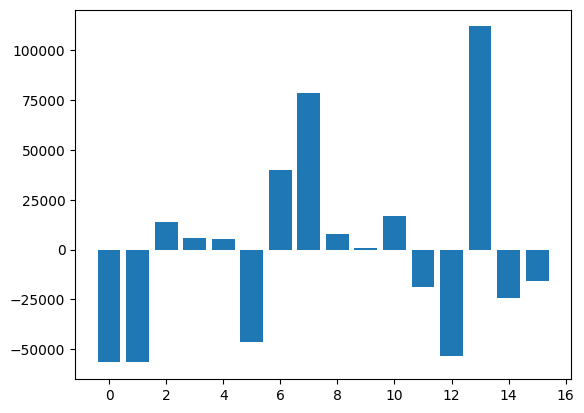

In [ ]:
# CODE HERE
pyplot.bar([x for x in range(len(importance))], importance)  # plot feature importance
pyplot.show()

## Now is the time to evaluate the final model on the test set.
# Evaluate Your System on the Test Set

1-get the predictors and the labels from your test set

In [ ]:
# CODE HERE
from sklearn.preprocessing import OneHotEncoder

x_test = test_set.drop('median_house_value',axis = 1)
y_test = test_set['median_house_value'].copy()

'''
housing_cat = x_test[['ocean_proximity']]
ohe = OneHotEncoder()
ohe_housing = ohe.fit_transform(housing_cat)
arr_ohe_test_cat = ohe_housing.toarray()
df_ohe_test_cat = pd.DataFrame(arr_ohe_test_cat)
test_set_full = test_set.join(df_ohe_test_cat)

test_set_full.head() '''

"\nhousing_cat = x_test[['ocean_proximity']]\nohe = OneHotEncoder()\nohe_housing = ohe.fit_transform(housing_cat)\narr_ohe_test_cat = ohe_housing.toarray()\ndf_ohe_test_cat = pd.DataFrame(arr_ohe_test_cat)\ntest_set_full = test_set.join(df_ohe_test_cat)\n\ntest_set_full.head() "

2-run your full_pipeline to transform the data

In [ ]:
# CODE HERE
test_prepared = full_pipeline.fit_transform(test_set)

3-evaluate the final model on the test set

In [ ]:
# CODE HERE
final_predictions = lin_reg.predict(test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

71067.06604346125

# compute a 95% confidence interval for the generalization error
*using scipy.stats.t.interval():*

In [ ]:
from scipy import stats

In [ ]:
# CODE HERE
stats.t.interval(alpha=0.95, df=len(housing_prepared)-1, loc=np.mean(housing_prepared), scale=stats.sem(housing_prepared))

<ipython-input-27-3b2a538e59e2>:2: DeprecationWarning: Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
  stats.t.interval(alpha=0.95, df=len(housing_prepared)-1, loc=np.mean(housing_prepared), scale=stats.sem(housing_prepared))


(array([0.04724567, 0.04724567, 0.04724567, 0.04724567, 0.04724567,
        0.04724567, 0.04724567, 0.04724567, 0.04724567, 0.04724567,
        0.04724567, 0.05491982, 0.0554047 , 0.06226261, 0.05768401,
        0.05743215]),
 array([0.07775433, 0.07775433, 0.07775433, 0.07775433, 0.07775433,
        0.07775433, 0.07775433, 0.07775433, 0.07775433, 0.07775433,
        0.07775433, 0.07008018, 0.0695953 , 0.06273739, 0.06731599,
        0.06756785]))

# Great Job!
# #shAI_Club